# Name:saiful islam ID:170104146 Group:c2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.import library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as matplot

# 2.Read  Train file

In [4]:
training_Data = np.loadtxt('/content/drive/MyDrive/pattern lab/train.txt',delimiter = ' ')

# 3.Read Test file

In [5]:
testing_Data = np.loadtxt('/content/drive/MyDrive/pattern lab/test.txt',delimiter = ' ')

# 4.Separate Training data in class A and class B

In [20]:
class_A =[]
for a in training_Data:
    if a[2] == 1:
        class_A.append([a[0],a[1]])

In [21]:
class_B =[]
for a in training_Data:
    if a[2] == 2:
        class_B.append([a[0],a[1]])

# 5.separate test values and their class

In [22]:
test_Values =[]
test_Class =[]
for a in testing_Data:
    test_Values.append([a[0],a[1]])
    test_Class.append(a[2])

# 6.convert the list to np array

In [23]:
class_A = np.array(class_A)
class_B = np.array(class_B)
test_Values = np.array(test_Values)
test_Class = np.array(test_Class)

#7.Ploting Training Data

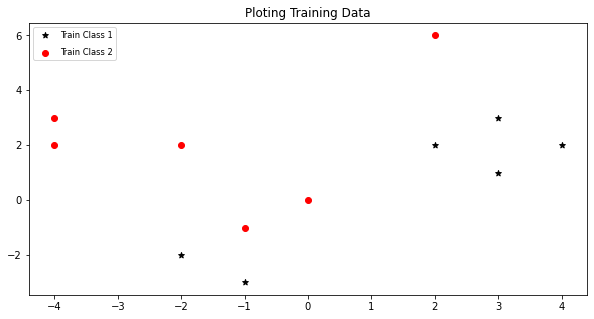

In [24]:
fig,ax = matplot.subplots()
ax.set_title('Ploting Training Data')
fig.set_figheight(5)
fig.set_figwidth(10)
ax.scatter(class_A[:,0],class_A[:,1],marker='*',color='k',label='Train Class 1')
ax.scatter(class_B[:,0],class_B[:,1],marker='o',color='r',label='Train Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
matplot.show()

In [25]:
meanClassA = np.mean(class_A,axis = 0)
meanClassB = np.mean(class_B,axis = 0)

# 8.mean of class A and class B

In [26]:
print(meanClassA)
print(meanClassB)

[1.5 0.5]
[-1.5  2. ]


In [27]:
predictionClass_A = [0]*len(test_Values)
predictionClass_B = [0]*len(test_Values)
predictionClass = [0]*len(test_Values)

In [ ]:
print(test_Values)
print(predictionClass_A)

# 9.create a temporary numpy array for store

In [29]:
tempValue = np.zeros((len(test_Values),3))

# 10.predict class





In [31]:
for i in range(len(test_Values)):
    predictionClass_A[i] = np.dot(np.transpose(meanClassA),test_Values[i]-.5*np.dot(np.transpose(meanClassA),meanClassA))
    predictionClass_B[i] = np.dot(np.transpose(meanClassB),test_Values[i]-.5*np.dot(np.transpose(meanClassB),meanClassB))
    if(predictionClass_A[i]>predictionClass_B[i]):
        tempValue[i][0] = test_Values[i][0]
        tempValue[i][1] = test_Values[i][1]
        tempValue[i][2] = 1
        predictionClass[i] = 1
    else:
        tempValue[i][0] = test_Values[i][0]
        tempValue[i][1] = test_Values[i][1]
        tempValue[i][2] = 2
        predictionClass[i] = 2

# 11. IF tempValue 1 then its in class A

In [32]:
class_test_A =[]
for a in tempValue:
    if a[2] == 1:
        class_test_A.append([a[0],a[1]])

# 12. IF tempValue 1 then its in class B

In [33]:
class_test_B =[]
for a in tempValue:
    if a[2] == 2:
        class_test_B.append([a[0],a[1]])

# 13.convert the list in numpy array

In [34]:
class_test_A =np.array(class_test_A)
class_test_B = np.array(class_test_B)
predictionClass = np.array(predictionClass)

# 14.plotting the meanclass,predicted class and training class

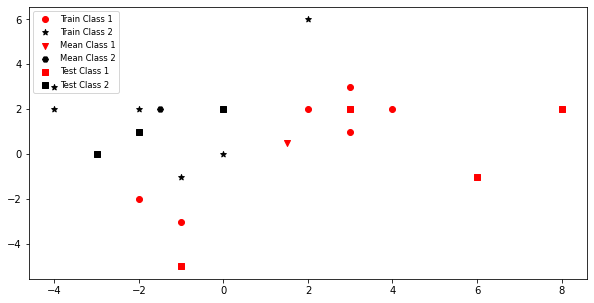

In [35]:
fig, ax = matplot.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

ax.scatter(class_A[:,0],class_A[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(class_B[:,0],class_B[:,1],marker='*',color='k',label='Train Class 2')
ax.scatter(meanClassA[0],meanClassA[1],marker='v',color='r',label='Mean Class 1')
ax.scatter(meanClassB[0],meanClassB[1],marker='H',color='k',label='Mean Class 2')
ax.scatter(class_test_A[:,0],class_test_A[:,1],marker='s',color='r',label='Test Class 1')
ax.scatter(class_test_B[:,0],class_test_B[:,1],marker='s',color='k',label='Test Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
matplot.show()

In [36]:
X=[0]*12
Y=[0]*12
c=0
for x in range(-4,8,1):
    j=-((meanClassA[0]-meanClassB[0])*x-.5*np.dot(np.transpose(meanClassA),meanClassA)+
        .5*np.dot(np.transpose(meanClassB),meanClassB))/(meanClassA[1]-meanClassB[1])
    X[c]=x
    Y[c]=j
    c+=1  

#15.Ploting final output with decision Boundary 

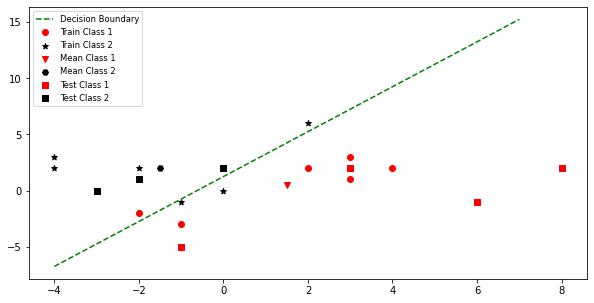

In [37]:
fig, ax = matplot.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax.plot(X,Y,"--",label='Decision Boundary',color="g")
ax.scatter(class_A[:,0],class_A[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(class_B[:,0],class_B[:,1],marker='*',color='k',label='Train Class 2')
ax.scatter(meanClassA[0],meanClassA[1],marker='v',color='r',label='Mean Class 1')
ax.scatter(meanClassB[0],meanClassB[1],marker='H',color='k',label='Mean Class 2')
ax.scatter(class_test_A[:,0],class_test_A[:,1],marker='s',color='r',label='Test Class 1')
ax.scatter(class_test_B[:,0],class_test_B[:,1],marker='s',color='k',label='Test Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
matplot.show()

# 16.Model accuracy

In [39]:
accuracy = 0
for x,y in zip(test_Class,predictionClass):
    if (x == y):
        accuracy +=1
accuracy = accuracy/len(test_Class)*100
print('Accuracy = ', accuracy)

Accuracy =  85.71428571428571
